In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sb
import datetime
from scipy import stats
import os
import platform

%matplotlib inline

In [2]:
import plotly.express as px

In [3]:
import shutil

In [4]:
os.listdir('C:/Users/ASUS/Desktop/Notebooks')

['.ipynb_checkpoints',
 '201902-fordgobike-tripdata.csv',
 'bike_data_clean.csv',
 'Exploratory Visualization I.ipynb',
 'Part_II_slide_deck.ipynb',
 'Part_II_slide_deck.slides.html',
 'README.md.md']

In [5]:
bike_df = pd.read_csv('C:/Users/ASUS/Desktop/Notebooks/201902-fordgobike-tripdata.csv')

In [6]:
bike_df.head()

duration_sec                start_time                  end_time  \
0         52185  2019-02-28 17:32:10.1450  2019-03-01 08:01:55.9750   
1         42521  2019-02-28 18:53:21.7890  2019-03-01 06:42:03.0560   
2         61854  2019-02-28 12:13:13.2180  2019-03-01 05:24:08.1460   
3         36490  2019-02-28 17:54:26.0100  2019-03-01 04:02:36.8420   
4          1585  2019-02-28 23:54:18.5490  2019-03-01 00:20:44.0740   

   start_station_id                                start_station_name  \
0              21.0  Montgomery St BART Station (Market St at 2nd St)   
1              23.0                     The Embarcadero at Steuart St   
2              86.0                           Market St at Dolores St   
3             375.0                           Grove St at Masonic Ave   
4               7.0                               Frank H Ogawa Plaza   

   start_station_latitude  start_station_longitude  end_station_id  \
0               37.789625              -122.400811            13.0   
1               37.791464              -122.391034            81.0   
2               37.769305              -122.426826             3.0   
3               37.774836              -122.446546            70.0   
4               37.804562              -122.271738           222.0   

                               end_station_name  end_station_latitude  \
0                Commercial St at Montgomery St             37.794231   
1                            Berry St at 4th St             37.775880   
2  Powell St BART Station (Market St at 4th St)             37.786375   
3                        Central Ave at Fell St             37.773311   
4                         10th Ave at E 15th St             37.792714   

   end_station_longitude  bike_id   user_type  member_birth_year  \
0            -122.402923     4902    Customer             1984.0   
1            -122.393170     2535    Customer                NaN   
2            -122.404904     5905    Customer             1972.0   
3            -122.444293     6638  Subscriber             1989.0   
4            -122.248780     4898  Subscriber             1974.0   

  member_gender bike_share_for_all_trip  
0          Male                      No  
1           NaN                      No  
2          Male                      No  
3         Other                      No  
4          Male                     Yes

In [7]:
bike_df.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip'],
      dtype='object')

In [8]:
bike_df.describe()

duration_sec  start_station_id  start_station_latitude  \
count  183412.000000     183215.000000           183412.000000   
mean      726.078435        138.590427               37.771223   
std      1794.389780        111.778864                0.099581   
min        61.000000          3.000000               37.317298   
25%       325.000000         47.000000               37.770083   
50%       514.000000        104.000000               37.780760   
75%       796.000000        239.000000               37.797280   
max     85444.000000        398.000000               37.880222   

       start_station_longitude  end_station_id  end_station_latitude  \
count            183412.000000   183215.000000         183412.000000   
mean               -122.352664      136.249123             37.771427   
std                   0.117097      111.515131              0.099490   
min                -122.453704        3.000000             37.317298   
25%                -122.412408       44.000000             37.770407   
50%                -122.398285      100.000000             37.781010   
75%                -122.286533      235.000000             37.797320   
max                -121.874119      398.000000             37.880222   

       end_station_longitude        bike_id  member_birth_year  
count          183412.000000  183412.000000      175147.000000  
mean             -122.352250    4472.906375        1984.806437  
std                 0.116673    1664.383394          10.116689  
min              -122.453704      11.000000        1878.000000  
25%              -122.411726    3777.000000        1980.000000  
50%              -122.398279    4958.000000        1987.000000  
75%              -122.288045    5502.000000        1992.000000  
max              -121.874119    6645.000000        2001.000000

In [9]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [10]:
bike_df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [11]:
# drop columns with null values
bike_df = bike_df.dropna()

In [12]:
bike_df.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [13]:
# change datatype of start_time and end_time

bike_df[['start_time', 'end_time']] = bike_df[['start_time', 'end_time']].apply(pd.to_datetime)

In [14]:
# create day column to carry day name

bike_df['day']= bike_df['start_time'].dt.day_name()

In [15]:
bike_df['day'].value_counts()

Thursday     33712
Tuesday      30584
Wednesday    28426
Friday       27663
Monday       25641
Sunday       14512
Saturday     14414
Name: day, dtype: int64

In [16]:
# create is_weekend column as integers 0 and 1 (1 for weekends, 0 for weekdays)

bike_df['is_weekend'] = (bike_df['start_time'].dt.weekday >=5).astype(int)

In [17]:
bike_df.is_weekend.value_counts()

0    146026
1     28926
Name: is_weekend, dtype: int64

In [18]:
bike_df.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip', 'day',
       'is_weekend'],
      dtype='object')

In [19]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  float64       
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  float64       
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type       

In [20]:
# convert float to datetime datatype
bike_df['member_birth_year'] = pd.to_datetime(bike_df['member_birth_year'], format='%Y')

In [21]:
# calculate the age of bike users
bike_df['age'] = max(pd.DatetimeIndex(bike_df['start_time']).year) - (pd.DatetimeIndex(bike_df['member_birth_year']).year)

In [22]:
bike_df['duration_sec'] = bike_df['duration_sec'].div(60)

In [23]:
# rename duration_sec column to 'duration'

bike_df.rename(columns={'duration_sec': 'duration'}, inplace=True)

In [24]:
bike_df.head()

duration              start_time                end_time  \
0   869.750000 2019-02-28 17:32:10.145 2019-03-01 08:01:55.975   
2  1030.900000 2019-02-28 12:13:13.218 2019-03-01 05:24:08.146   
3   608.166667 2019-02-28 17:54:26.010 2019-03-01 04:02:36.842   
4    26.416667 2019-02-28 23:54:18.549 2019-03-01 00:20:44.074   
5    29.883333 2019-02-28 23:49:58.632 2019-03-01 00:19:51.760   

   start_station_id                                start_station_name  \
0              21.0  Montgomery St BART Station (Market St at 2nd St)   
2              86.0                           Market St at Dolores St   
3             375.0                           Grove St at Masonic Ave   
4               7.0                               Frank H Ogawa Plaza   
5              93.0                      4th St at Mission Bay Blvd S   

   start_station_latitude  start_station_longitude  end_station_id  \
0               37.789625              -122.400811            13.0   
2               37.769305              -122.426826             3.0   
3               37.774836              -122.446546            70.0   
4               37.804562              -122.271738           222.0   
5               37.770407              -122.391198           323.0   

                               end_station_name  end_station_latitude  \
0                Commercial St at Montgomery St             37.794231   
2  Powell St BART Station (Market St at 4th St)             37.786375   
3                        Central Ave at Fell St             37.773311   
4                         10th Ave at E 15th St             37.792714   
5                            Broadway at Kearny             37.798014   

   end_station_longitude  bike_id   user_type member_birth_year member_gender  \
0            -122.402923     4902    Customer        1984-01-01          Male   
2            -122.404904     5905    Customer        1972-01-01          Male   
3            -122.444293     6638  Subscriber        1989-01-01         Other   
4            -122.248780     4898  Subscriber        1974-01-01          Male   
5            -122.405950     5200  Subscriber        1959-01-01          Male   

  bike_share_for_all_trip       day  is_weekend  age  
0                      No  Thursday           0   35  
2                      No  Thursday           0   47  
3                      No  Thursday           0   30  
4                     Yes  Thursday           0   45  
5                      No  Thursday           0   60

In [25]:
# drop unused columns

bike_df = bike_df.drop(['start_station_id', 'start_station_latitude', 'start_station_longitude', 
              'end_station_id','end_station_latitude', 'end_station_longitude', 
              'member_birth_year'], axis=1)

In [26]:
bike_df.columns

Index(['duration', 'start_time', 'end_time', 'start_station_name',
       'end_station_name', 'bike_id', 'user_type', 'member_gender',
       'bike_share_for_all_trip', 'day', 'is_weekend', 'age'],
      dtype='object')

In [27]:
bike_df.describe(percentiles=[0.25,0.50,0.75,0.95,0.99])

duration        bike_id     is_weekend            age
count  174952.000000  174952.000000  174952.000000  174952.000000
mean       11.733379    4482.587555       0.165337      34.196865
std        27.370082    1659.195937       0.371485      10.118731
min         1.016667      11.000000       0.000000      18.000000
25%         5.383333    3799.000000       0.000000      27.000000
50%         8.500000    4960.000000       0.000000      32.000000
75%        13.150000    5505.000000       0.000000      39.000000
95%        25.516667    6463.000000       1.000000      55.000000
99%        52.933333    6591.000000       1.000000      64.000000
max      1409.133333    6645.000000       1.000000     141.000000

In [28]:
# remove outliers from the dataset

bike_df = bike_df[bike_df['age'] <=64]
bike_df = bike_df[bike_df['duration'] <= 52.93]

In [29]:
bike_df.columns

Index(['duration', 'start_time', 'end_time', 'start_station_name',
       'end_station_name', 'bike_id', 'user_type', 'member_gender',
       'bike_share_for_all_trip', 'day', 'is_weekend', 'age'],
      dtype='object')

In [30]:
bike_df['day'].value_counts()

Thursday     33164
Tuesday      30142
Wednesday    27992
Friday       27172
Monday       25127
Saturday     13982
Sunday       13960
Name: day, dtype: int64

## What is the structure of your dataset?

The original dataset contained 183,412 records with 16 features. However, after preliminary wrangling and the engineering of new features, the dataset has 174,952 records and 13 features

## What is/are the main features of interest in your dataset?

The main features of interest is the age and user type demographic of the customer base and the period of the week with the most customer engagements.

## What features in the dataset do you think will help support your investigation into your feature(s) of interest?

The investigation of the relationship between the user type and age with other feature counts will reveal the customer demographics while the relationship between datetime datatype with other features will reveal peak periods.

## Univariate Exploration

### Question - What is the duration distribution in the dataset?

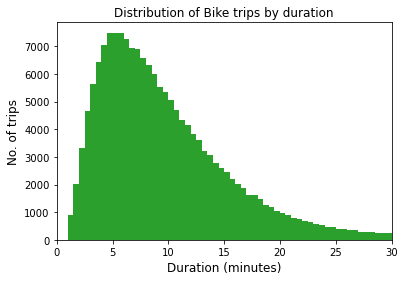

In [31]:
base_color = sb.color_palette()[2]
bin_edges = np.arange(0, bike_df['duration'].max()+0.5, 0.5)
plt.hist(data = bike_df, x='duration', color=base_color, bins= bin_edges)
plt.xlim(0,30)
plt.title('Distribution of Bike trips by duration')
plt.xlabel('Duration (minutes)', fontsize = 12)
plt.ylabel('No. of trips', fontsize=12);

The distrubution of the duration of bike trips is right skewed. The distribution can be normalized by applying a logarithmic scale on the duration axis.

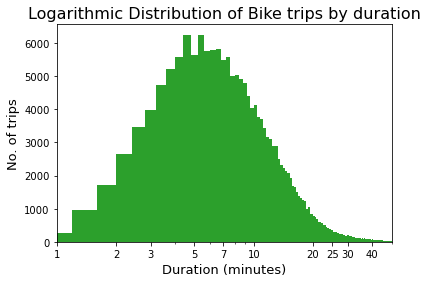

In [32]:
base_color = sb.color_palette()[2]
bin_edges = np.arange(0, bike_df['duration'].max()+0.4, 0.4)
plt.hist(data = bike_df, x='duration', color=base_color, bins= bin_edges)
plt.xscale('log')
ticks = [1, 2, 3, 5, 7, 10, 20, 25, 30, 40]
labels = ['{}'.format(t) for t in ticks]
plt.xticks(ticks, labels)
plt.xlim(1,50)
plt.title('Logarithmic Distribution of Bike trips by duration',fontsize=16)
plt.xlabel('Duration (minutes)', fontsize = 13)
plt.ylabel('No. of trips', fontsize=13);

### Question - What is the age distribution among Ford bikes customers?

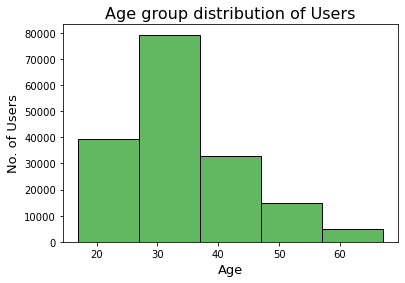

In [33]:
bin_edges = range(17, bike_df['age'].max()+5, 10)
sb.histplot(x=bike_df['age'], color=base_color, bins= bin_edges)
plt.title('Age group distribution of Users', fontsize=16)
plt.xlabel('Age', fontsize= 13)
plt.ylabel('No. of Users', fontsize= 13);

It can be seen that the highest number of users are within their late 20s and late 30s. This is followed by users within their late teenage years and 20s. This is closely followed by users in their 40s.

### Question - What is the trend of bike rides for the month?

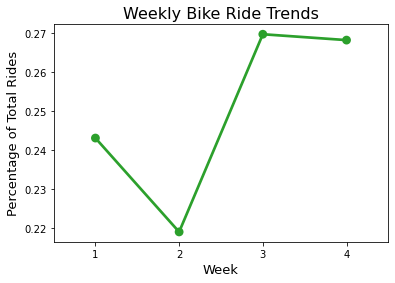

In [34]:
trips_by_week = (bike_df['start_time'].apply(lambda d: (d.day-1) // 7 + 1).value_counts().sort_index())/bike_df.shape[0]
sb.pointplot(data= bike_df, x=trips_by_week.index, y=trips_by_week.values, color=base_color)
plt.title('Weekly Bike Ride Trends', fontsize= 16)
plt.xlabel('Week',fontsize= 13)
plt.ylabel('Percentage of Total Rides', fontsize= 13);

The percentage ride per week is highest in the 3rd week of the month, closely followed by the 4th week of the month. The lowest percentage of total weekly rides occured in the second week.

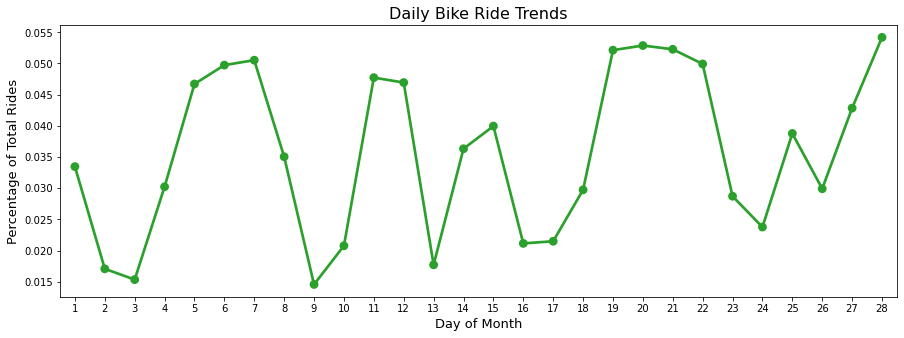

In [35]:
trips_by_day = bike_df['start_time'].dt.day.value_counts()/bike_df.shape[0]
plt.figure(figsize=[15, 5])
sb.pointplot(data= bike_df, x=trips_by_day.index, y=trips_by_day.values, color=base_color)
plt.title('Daily Bike Ride Trends', fontsize= 16)
plt.xlabel('Day of Month',fontsize= 13)
plt.ylabel('Percentage of Total Rides', fontsize= 13);

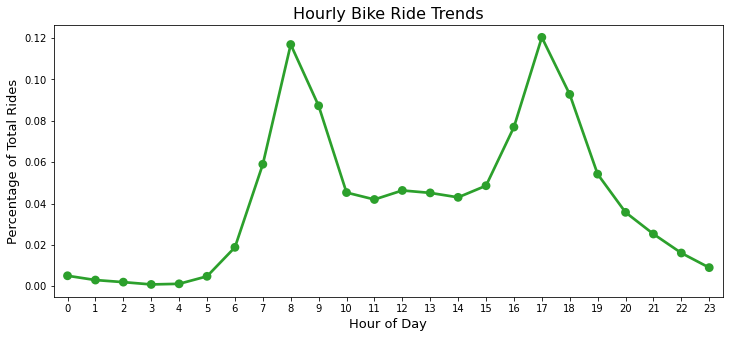

In [36]:
plt.figure(figsize=[12,5])
trips_by_hour = bike_df['start_time'].dt.hour.value_counts()/bike_df.shape[0]
sb.pointplot(data=bike_df, x=trips_by_hour.index, y=trips_by_hour.values, color=base_color)
plt.title('Trips ')
plt.title('Hourly Bike Ride Trends', fontsize= 16)
plt.xlabel('Hour of Day',fontsize= 13)
plt.ylabel('Percentage of Total Rides', fontsize= 13);

- There is no clear pattern in the daily percentages of bike rides. 
- However, the hourly rides becomes significant during the rush hours (6am - 10am) and (4pm - 7pm). This shows bike rides increases during hours when people commute to work and retun home.

In [37]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
days_class = pd.api.types.CategoricalDtype(categories=days, ordered=True)
bike_df['day'] = bike_df['day'].astype(days_class)

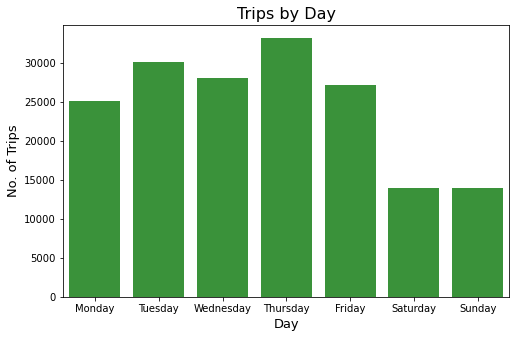

In [38]:
plt.figure(figsize=[8,5])
sb.countplot(data=bike_df, x='day', color=base_color)
plt.title('Trips by Day', fontsize=16)
plt.xlabel('Day', fontsize=13)
plt.ylabel('No. of Trips', fontsize=13);

### Question - What is the user type and gender category like?

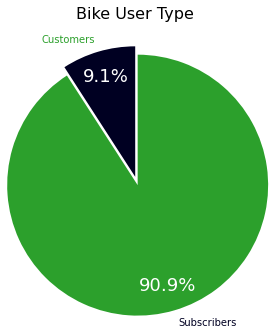

In [39]:
labels=['Subscribers', 'Customers']
explode=(0.1, 0)
fig, ax = plt.subplots()
patches, texts, autotexts  = ax.pie(bike_df['user_type'].value_counts(), radius=1.5, labels = labels, autopct='%1.1f%%',
                                    pctdistance=0.8,startangle=90, counterclock= False, colors=[base_color, '#002'],
                                   explode=explode)
[text.set_color(base_color) for text in texts]
texts[0].set_color('#002')
[autotext.set_color('white') for autotext in autotexts]
[autotext.set_fontsize(18) for autotext in autotexts]
plt.title('Bike User Type', y=1.2, fontsize=16)
plt.show()

The User type is highly dominated by Subscribers: taking about 91% of the user type. 

In [40]:
bike_df.drop(bike_df[bike_df['member_gender'] == 'Other'].index, inplace=True)

#### Gender Category

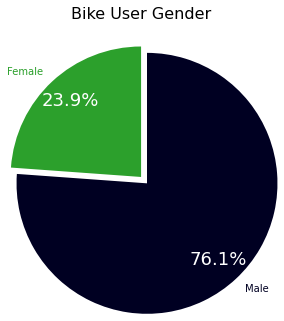

In [41]:
fig, ax = plt.subplots()
labels=['Male','Female']
explode=(0.1,0)

patches, texts, autotexts = ax.pie(bike_df['member_gender'].value_counts(), radius= 1.5, startangle=90, counterclock=False,
                                    autopct='%1.1f%%',pctdistance=0.8,labels=labels, 
                                   explode=explode, colors=['#002', base_color])
[text.set_color(base_color) for text in texts]
texts[0].set_color('#002')
[autotext.set_color('white') for autotext in autotexts]
[autotext.set_fontsize(18) for autotext in autotexts]
plt.title('Bike User Gender', y= 1.2, fontsize=16)
plt.show()

There are about 76% male users and 24% female users in the bike user demographic. 

### Question - What is the Weekday vs Weekend Usage?

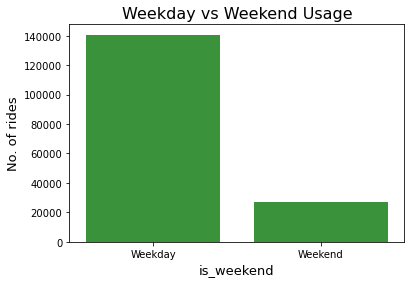

In [42]:
sb.countplot(data=bike_df, x='is_weekend', color=base_color)
ticks = [0, 1]
labels=['Weekday', 'Weekend']
plt.xticks(ticks, labels)
plt.title('Weekday vs Weekend Usage', fontsize=16)
plt.ylabel('No. of rides', fontsize=13)
plt.xlabel('is_weekend',fontsize=13);

The number of bike rides during the weekdays highly overshadows the numbers during the weekend.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

- The distribution of the duration of trips is highly skewed to the right. Although, after applying a logarithmic scale, the distribution appeared normal; with modes around the 5-7 minutes duration mark. 
- The age distribution of users is between 18 and 60. Most users fall in their late 20s and late 30s. Users in their 60s are the least.
- There are more male users 76% than female users (24%) and 91% of users are subscribers while 9% are customers.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

I converted the start_time and end_time columns to datetime, then extacted the day_name of each record. Afterwards, I created a column to carry a category of the day; either weekend or weekday.
I converted the member_birth_year from string to datetime and then calculated the age of users by substracting the 'member_birth_year' from the current year.
I also dropped unused columns in the dataset, and removed outliers at the 99th percentile.

## Bivariate Exploration

### Question - What is the relationship between the Duration used per ride and the user type? Do subscribers spend more time on a single ride?

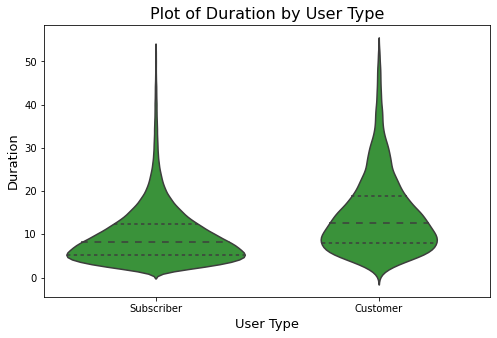

In [43]:
plt.figure(figsize=[8,5])
sb.violinplot(data=bike_df, x='user_type', y='duration', color=base_color, inner='quartile')
plt.title('Plot of Duration by User Type', fontsize=16)
plt.xlabel('User Type', fontsize=13)
plt.ylabel('Duration', fontsize=13);

Customers tend to take longer duration on a single ride. Meanwhile, Subscribers take lesser time on bike trips.

### Question - Do Users take longer duration during the weekdays?

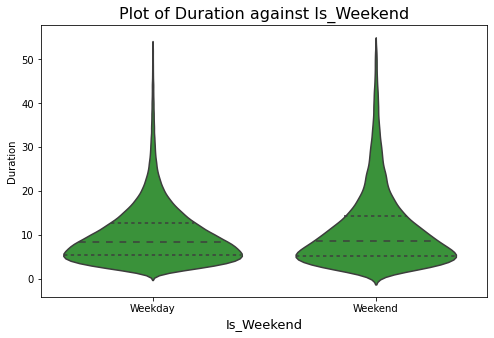

In [44]:
plt.figure(figsize=[8,5])
sb.violinplot(data=bike_df, x='is_weekend', y='duration', inner='quartile', color=base_color)
ticks=[0,1]
labels=['Weekday', 'Weekend']
plt.xticks(ticks, labels)
plt.title('Plot of Duration against Is_Weekend', fontsize=16)
plt.xlabel('Is_Weekend', fontsize=13)
plt.ylabel('Duration');

There does not appear to be any significant difference in the duration spent by users during the weekend against weekdays. Although, more bike trips are taken during the weekdays than weekends.

### Question - Duration vs Gender

In [45]:
bike_df['member_gender'].value_counts()

Male      127962
Female     40081
Name: member_gender, dtype: int64

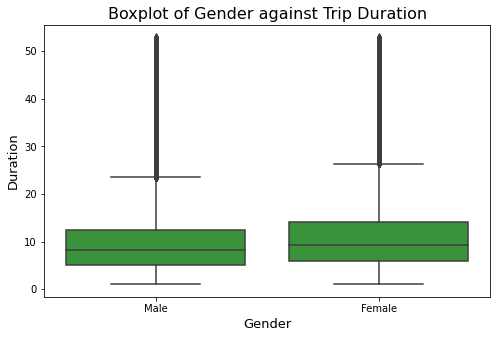

In [46]:
plt.figure(figsize=[8,5])
sb.boxplot(data=bike_df, x='member_gender', y='duration', color=base_color)
plt.title('Boxplot of Gender against Trip Duration', fontsize=16)
plt.xlabel('Gender', fontsize=13)
plt.ylabel('Duration', fontsize=13);

Surprisingly, Females spend a slightly higher average duration more than males. Could it be that males are more like to make subscriptions than females?

In [47]:
b = 100*(bike_df.groupby(['user_type', 'member_gender']).member_gender.count()/bike_df['member_gender'].count())
b_df = pd.DataFrame(b)

In [48]:
b.reset_index(name='percentage')

user_type member_gender  percentage
0    Customer        Female    2.582077
1    Customer          Male    6.487625
2  Subscriber        Female   21.269556
3  Subscriber          Male   69.660742

In [49]:
bike_df['member_gender'].groupby(bike_df['member_gender']).count()

member_gender
Female     40081
Male      127962
Name: member_gender, dtype: int64

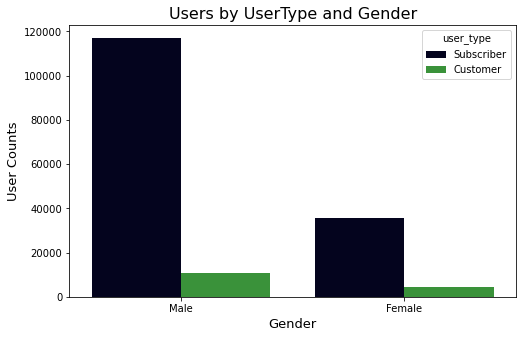

In [50]:
plt.figure(figsize=[8,5])
g = sb.countplot(data=bike_df, x='member_gender', hue='user_type', palette=['#002', base_color])
#total count of males and females
# total =  
# patches = ax.patches
# for i in range(len(patches)):
#     percentage = (patches[i].get_height()/total)*100
#     x = patches[i].get_x() + patches[i].get_width()
#     y = patches[i].get_height()+0.7
#     ax.annotate('{:.1f}%'.format(percentage), (x, y), ha = 'right')
# plt.show()
g.set_title('Users by UserType and Gender', fontsize=16)
g.set_xlabel('Gender', fontsize=13)
g.set_ylabel('User Counts', fontsize=13);

28.4% of customers are females while 23.4% of subscribers are females. This shows that females are less likely to be subscribers.

### Question - What is the distribution of UserType by Day

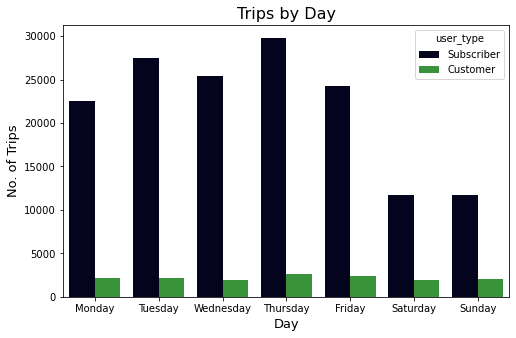

In [51]:
plt.figure(figsize=[8,5])
ax = sb.countplot(data=bike_df, x='day', hue='user_type', palette=['#002', base_color])
plt.title('Trips by Day', fontsize=16)
plt.xlabel('Day', fontsize=13)
plt.ylabel('No. of Trips', fontsize=13);

The usage pattern by subscribers significantly reduces during the weekend while the usage pattern by customers stays significantly unchanged.

### Question - What is the difference in the hourly duration of Subscribers and Customers?

In [52]:
cust = bike_df['user_type'] == 'Customer'
sub = bike_df['user_type'] == 'Subscriber'

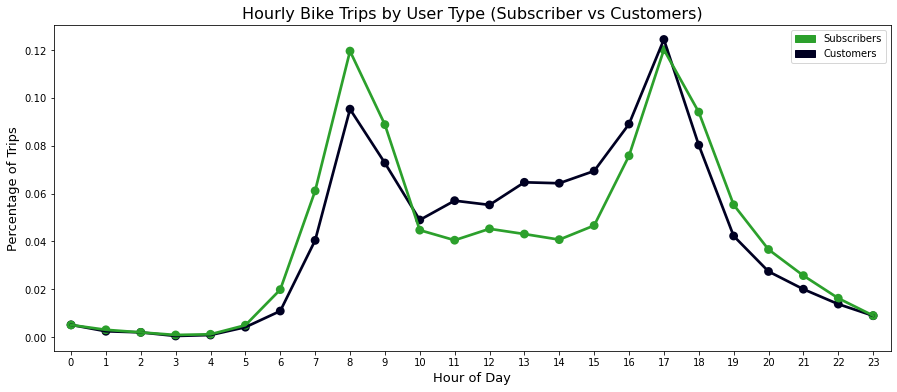

In [53]:
plt.figure(figsize=[15,6])
sb.pointplot(data=bike_df, x=(bike_df.start_time[cust].dt.hour.value_counts()/bike_df[cust].shape[0]).index,
                              y=(bike_df.start_time[cust].dt.hour.value_counts()/bike_df[cust].shape[0]).values, color='#002')

sb.pointplot(data=bike_df, x=(bike_df.start_time[sub].dt.hour.value_counts()/bike_df[sub].shape[0]).index,
                              y=(bike_df.start_time[sub].dt.hour.value_counts()/bike_df[sub].shape[0]).values, color=base_color)
sub_patch = mpatches.Patch(color=base_color, label='Subscribers')
cust_patch = mpatches.Patch(color='#002', label='Customers')
plt.legend(handles=[sub_patch, cust_patch])
plt.title('Hourly Bike Trips by User Type (Subscriber vs Customers)', fontsize=16)
plt.xlabel('Hour of Day',fontsize=13)
plt.ylabel('Percentage of Trips',fontsize=13);

Subscribers seem to use bikes more during the rushing hours (6am - 10am) and beyond 5pm. While customers use bikes more from the mid-day until rushing hours in the evening.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

Male users have lesser median duration per trip than females. However, there are more male users in the user demographic (126,723) than females (39,703). Also, there are not any significant changes in the number of trips by customers during the weekday and weekends. However, subscribers have significant fall in usage pattern during the weekend compared to the weekdays.

### Were there any interesting or surprising interactions between features?

Despite the domination of male users over female users, females have higher median duration on bike trips.

## Multivariate Exploration

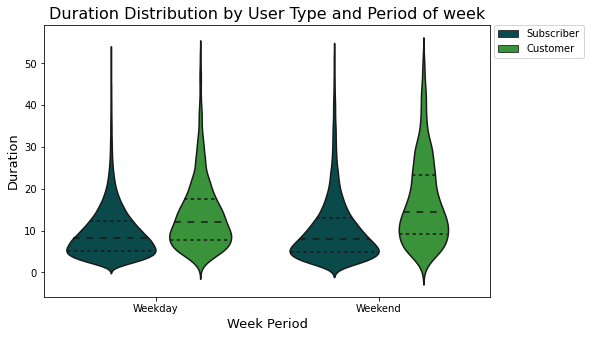

In [54]:
plt.figure(figsize=[8,5])
g = sb.violinplot(data=bike_df, x='is_weekend', y='duration', hue='user_type', inner='quartile',  palette=['#055', base_color])
ticks=[0,1]
labels=['Weekday', 'Weekend']
plt.xticks(ticks, labels)
plt.title('Duration Distribution by User Type and Period of week', fontsize=16)
plt.xlabel('Week Period', fontsize=13)
plt.ylabel('Duration', fontsize=13)
g.legend(bbox_to_anchor=(1.22, 1.02));

The median duration used by customers overshadows that of subscribers during both weekdays and weekends. Also, the distribution of the varieties of duration used by customers is larger during the weekends than weekdays. The median duration by subscribers looks unchanged during the weekends and weekdays. However, customers spend longer duration during the weekends than on weekdays. Although, the number of subscribers using bikes drops during the weekend, the median duration remains unchanged for both periods.

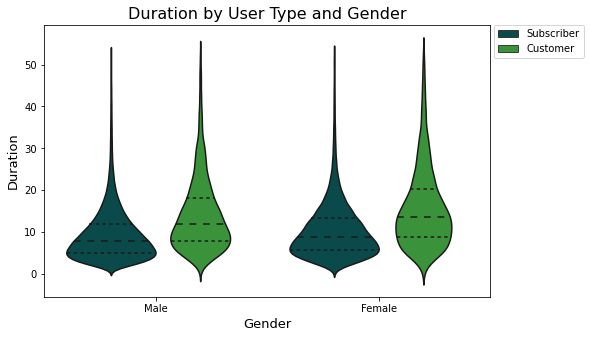

In [55]:
plt.figure(figsize=[8,5])
g = sb.violinplot(data=bike_df, x=bike_df['member_gender'], y='duration', inner='quartile', hue='user_type', 
              palette=['#055', base_color])
plt.title('Duration by User Type and Gender', fontsize=16)
plt.xlabel('Gender', fontsize=13)
plt.ylabel('Duration', fontsize=13)
g.legend(bbox_to_anchor=(1.22, 1.02));

Female customers tend to take longer duration per trip than any other user category. Despite having the largest numbers amongst users, male Subscribers use the least duration per trip. This could be the reason for the higher duration used by females per trip compared to males

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

From the bivariate exploration, female users spend longer duration on trips than male users. This is strongly supported by the multivariate plot of duration against gender (grouped by user_type). Female users in both (user_type) category spend more time on trips than males in either category. This is also supported by the bivariate plot that showed females more likely to be customers rather than subscribers.

### Were there any interesting or surprising interactions between features?

It is surprising that even though the number of customers using bikes looks significantly unchanged during weekdays and weekend, the median duration spent by customers is significantly higher during the weekends than on weekdays. Meanwhile, the median duration by subscribers is significantly unchanged.

## Conclusion

In this project, the following conclusions could be drawn:

• The distribution of trip durations is normal on the logarithmic scale with modal duration at around 5-7 minutes.

• The modal age of users is in the range of 28-38.

• There are more subscribers 91% than there are customers. There are also more males 76% than females 24%.

• The number of trips in the weekends falls sharply compared to weekdays.

• However, the hourly rides becomes significant during the rush hours (6am - 10am) and (4pm - 7pm). This shows bike rides increases during hours when people commute to work and retun home.

• Customers tend to take longer duration on a single ride than subscribers.

• There does not appear to be any significant difference in the duration spent by users during the weekend against weekdays. Although, more bike trips are taken during the weekdays than weekends.

• Females are more likely to be customers than subscribers.

• The usage pattern by subscribers reduces during the weekend while the usage pattern by customers stays mostly unchanged.

• Subscribers seem to use bikes more during the rushing hours (6am - 10am) and beyond 5pm. While customers use bikes more from the mid-day until rushing hours in the evening.

• Female customers tend to take longer duration per trip than any other user category.

In [56]:
#%notebook "C:/Users/ASUS/Desktop/Notebooks/exploratory_visualization.ipynb"

In [59]:
source = 'C:/Users/ASUS/Desktop/Notebook'
destination = 'C:/Users/ASUS/Desktop/Notebook/Project'

allfiles = os.listdir(source)

# iterate on all files to move them to destination folder
for f in allfiles:
    src_path = os.path.join(source, f)
    dst_path = os.path.join(destination, f)
    shutil.move(src_path, dst_path)

RuntimeError: File size unexpectedly exceeded ZIP64 limit